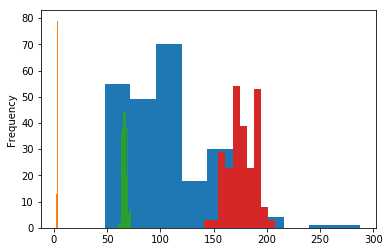

In [55]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/incorrect data in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of incorrect data)
import pandas as pd
import matplotlib.pyplot as plt


#declaring variable for filename
csv_file = 'Automobile.csv'
#declaring the variable for obtaining a part of dataframe 
auto_data = pd.read_csv(csv_file,sep ='#',decimal = '.',header = None,names = ["symboling","normalized-losses","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","wheel-base","length","width","height","curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"])


#quantifying the frequency of each item in body_style
auto_data["body_style"].value_counts()

auto_data["drive_wheels"].value_counts()
#quantifying the frequency of each item in engine_location
auto_data["engine_location"].value_counts()
#quantifying the frequency of each item in fuel_system 
auto_data["fuel_system"].value_counts()
#quantifying the  frequency of each make 
auto_data["make"].value_counts()
#quantifying the  frequency of each fuel_type 
auto_data["fuel_type"].value_counts()
#quantifying the  frequency of each aspiration 
auto_data["aspiration"].value_counts()
#quantifying the  frequency of each item in num_of_doors 
auto_data["num_of_doors"].value_counts()

#changing the datatype of num_of_doors from int to str
auto_data.num_of_doors = auto_data.num_of_doors.astype(str)


#traversing the list of columns where potential typo and redundant white space incorrect data exist
for column in ["make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","fuel_system"]:
    for i in range(len(auto_data[column])):
        #changing every word to lower case 
        auto_data.loc[i,column] = auto_data.loc[i,column].lower()
        #removing the  white spaces
        auto_data.loc[i,column] = auto_data.loc[i,column].strip()
    #fixing the typo for aspiration
        if column == "aspiration" and auto_data.loc[i,column] == "turrrrbo":
            auto_data.loc[i,column] = "turbo"
        #fixing the typo for make
        elif column == "make" and auto_data.loc[i,column] == "vol00112ov":
            auto_data.loc[i,column] = "volvo" 
        #fixing the typo for drive_wheels
        elif column == "drive_wheels" and auto_data.loc[i,column] == "4wd":
            auto_data.loc[i,column] = "fwd"
        #fixing the typo for num_of_doors
        elif column == "num_of_doors" and auto_data.loc[i,column] == "fourr":
            auto_data.loc[i,column] = "four"
        #fixing the typo for fuel_system
        elif column == "fuel_system":
            if auto_data.loc[i,column] == "spfi":
                auto_data.loc[i,column] = "spdi"
            elif auto_data.loc[i,column] == "mfi":
                auto_data.loc[i,column] = "mpfi"
            

#quantifying the frequency of each item in body_styles after making the changes
auto_data["body_style"].value_counts()
#quantifying the frequency of each item in drive_wheels after making the changes
auto_data["drive_wheels"].value_counts()
#quantifying the frequency of each item in engine_location after making the changes
auto_data["engine_location"].value_counts()
#quantifying the frequency of each item in fuel_system after making the changes
auto_data["fuel_system"].value_counts()
#quantifying the frequency again after making the changes
auto_data["make"].value_counts()
#quantifying the frequency of each item in fuel_type after making the changes
auto_data["fuel_type"].value_counts()
#quantifying the frequency of each item in aspiration after making the changes
auto_data["aspiration"].value_counts()
#quantifying the frequency of each item in num_of_doors  after making the changes
auto_data["num_of_doors"].value_counts()
#quantifying the frequency of each item in body_style after making the changes

#exchanging all the missing values with -1
auto_data.fillna(-1)






# finding outliers

auto_data["horsepower"].plot(kind="hist",bins = 10)
auto_data["stroke"].plot(kind="hist",bins = 10)
auto_data["width"].plot(kind="hist",bins = 10)
auto_data["length"].plot(kind="hist",bins = 10)







#correcting all the outliers and missing values in horsepower
for i in range(len(auto_data["horsepower"])):
    if auto_data.loc[i,"horsepower"] == -1 or auto_data.loc[i,"horsepower"]>225:
        #exchanging all the outliers and missing values with median of all horsepower values
        auto_data.loc[i,"horsepower"] = auto_data["horsepower"].median()


        
        
        
#correcting all the outliers and missing values in stroke
for i in range(len(auto_data["stroke"])):
    if auto_data.loc[i,"stroke"] == -1  or auto_data.loc[i,"stroke"] < 2.5 or auto_data.loc[i,"stroke"] > 3.7 :
         #exchanging all the outliers and missing values with median of all price values
        auto_data.loc[i,"stroke"] = auto_data["stroke"].median()
        
        
#correcting all the outliers and missing values in width
for i in range(len(auto_data["width"])):
    if auto_data.loc[i,"width"] == -1  or auto_data.loc[i,"width"] < 63 :
         #exchanging all the outliers and missing values with median of all price values
        auto_data.loc[i,"width"] = auto_data["width"].median()
        
        
#correcting all the outliers and missing values in length       
for i in range(len(auto_data["length"])):
    if auto_data.loc[i,"length"] == -1  or auto_data.loc[i,"length"] < 155 :
         #exchanging all the outliers and missing values with median of all price values
        auto_data.loc[i,"length"] = auto_data["length"].median()






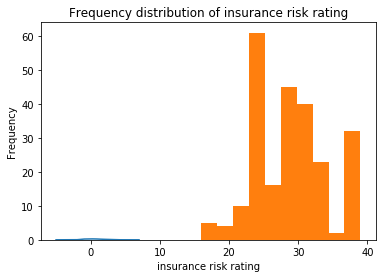

In [53]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Code goes after this line

import matplotlib.pyplot as plt

#ordinal value
auto_data["symboling"].plot(kind="density")
plt.xlabel("insurance risk rating")
plt.title("Frequency distribution of insurance risk rating")

#nominal value
auto_data["fuel_type"].value_counts().plot(kind="pie",autopct='%.2f')
plt.title("Frequency distribution of fuel types")


#numerical value
auto_data["stroke"].plot(kind="hist",bins = 10)
plt.xlabel("stroke")
plt.title("Frequency distribution of stroke")



        



Text(0.5, 1.0, 'Variation of highway_mpg with horsepower')

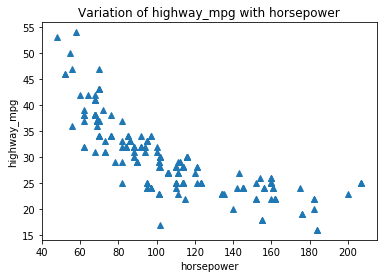

In [57]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line

#relation between horsepower and highway mileage
plt.plot(auto_data["horsepower"],auto_data["highway_mpg"],'^')
plt.xlabel("horsepower")
plt.ylabel("highway_mpg") 
plt.title("Variation of highway_mpg with horsepower")

#relation between length and width
plt.plot(auto_data["length"],auto_data["width"],'^')
plt.xlabel("length")
plt.ylabel("width") 
plt.title("Variation of width with length")

#relation between wheel base and width
plt.plot(auto_data["wheel-base"],auto_data["width"],'^')
plt.xlabel("wheel-base")
plt.ylabel("width") 
plt.title("Variation of wheel base with width")






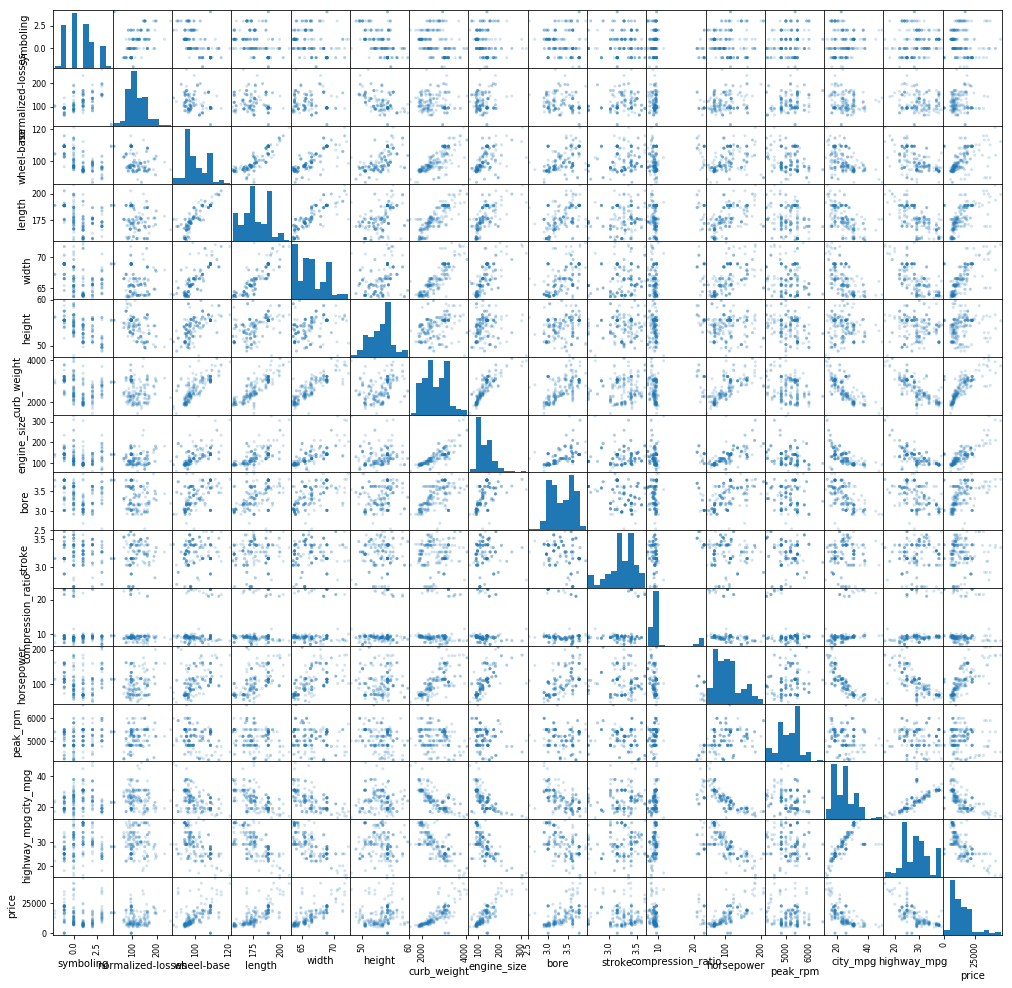

In [51]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns
#Code goes after this line
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#numerical values of the scatter matrix in the given data
scatter_matrix(auto_data,alpha = 0.2,figsize = (17,17),diagonal = "hist")
plt.show()


